In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

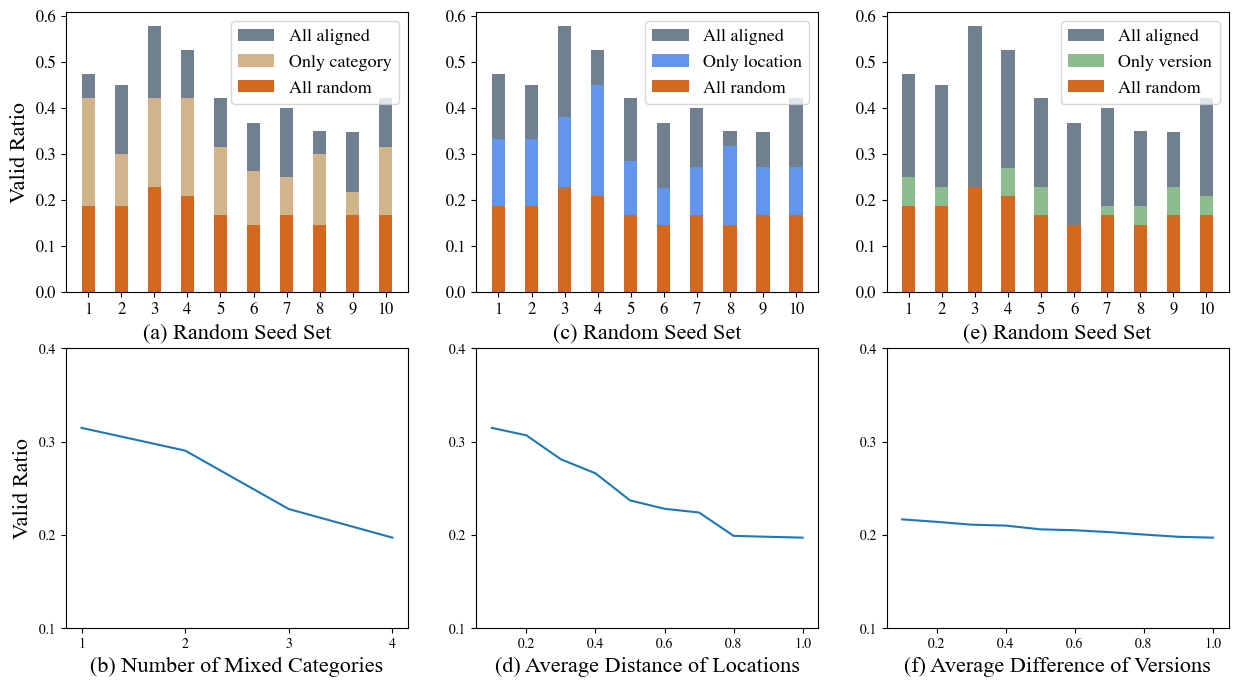

In [3]:
full = pd.read_csv('ablation-data/full-Ablation - full.csv')
all_random = pd.read_csv('ablation-data/random-Ablation - Random.csv')

wo_category = pd.read_csv('ablation-data/category-Ablation - category.csv')
wo_location = pd.read_csv('ablation-data/location-Ablation - location.csv')
wo_version = pd.read_csv('ablation-data/version-Ablation - version.csv')

div_category = pd.read_csv('ablation-data/category-div-Category.csv', index_col=0)
div_location = pd.read_csv('ablation-data/location-div-Location.csv', index_col=0)
div_version = pd.read_csv('ablation-data/version-div-Version.csv', index_col=0)

full_valid_ratio = full['Valid Ratio']
all_random_valid_ratio = all_random['Valid Ratio']
wo_category_valid_ratio = wo_category['Valid Ratio']
wo_location_valid_ratio = wo_location['Valid Ratio']
wo_version_valid_ratio = wo_version['Valid Ratio']

name_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.rc('font', family='Times')
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)

plt.xlabel("(a) Random Seed Set", fontdict={'family': 'Times New Roman', 'size': 16})
plt.ylabel("Valid Ratio", fontdict={'family': 'Times New Roman', 'size': 16})

plt.bar(range(len(full_valid_ratio)), full_valid_ratio, tick_label=name_list, width=0.4, label='All aligned', color='slategrey')
plt.bar(range(len(wo_category_valid_ratio)), wo_category_valid_ratio, tick_label=name_list, width=0.4, label='Only category', color='tan')
plt.bar(range(len(all_random_valid_ratio)), all_random_valid_ratio, tick_label=name_list, width=0.4, label='All random', color='chocolate')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=13, loc=1)

plt.subplot(2, 3, 2)

plt.xlabel("(c) Random Seed Set", fontdict={'family': 'Times New Roman', 'size': 16})
plt.bar(range(len(full_valid_ratio)), full_valid_ratio, tick_label=name_list, width=0.4, label='All aligned', color='slategrey')
plt.bar(range(len(wo_location_valid_ratio)), wo_location_valid_ratio, tick_label=name_list, width=0.4, label='Only location', color='cornflowerblue')
plt.bar(range(len(all_random_valid_ratio)), all_random_valid_ratio, tick_label=name_list, width=0.4, label='All random', color='chocolate')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=13, loc=1)

plt.subplot(2, 3, 3)

plt.xlabel("(e) Random Seed Set", fontdict={'family': 'Times New Roman', 'size': 16})
plt.bar(range(len(full_valid_ratio)), full_valid_ratio, tick_label=name_list, width=0.4, label='All aligned', color='slategrey')
plt.bar(range(len(wo_version_valid_ratio)), wo_version_valid_ratio, tick_label=name_list, width=0.4, label='Only version', color='darkseagreen')
plt.bar(range(len(all_random_valid_ratio)), all_random_valid_ratio, tick_label=name_list, width=0.4, label='All random', color='chocolate')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=13, loc=1)

plt.subplot(2, 3, 4)

plt.xlabel("(b) Number of Mixed Categories", fontdict={'family': 'Times New Roman', 'size': 16})
plt.ylabel("Valid Ratio", fontdict={'family': 'Times New Roman', 'size': 16})

plt.plot(div_category)
plt.xticks([1, 2, 3, 4])
plt.yticks([0.1, 0.2, 0.3, 0.4])

plt.subplot(2, 3, 5)

plt.xlabel("(d) Average Distance of Locations", fontdict={'family': 'Times New Roman', 'size': 16})

plt.plot(div_location)
plt.yticks([0.1, 0.2, 0.3, 0.4])

plt.subplot(2, 3, 6)

plt.xlabel("(f) Average Difference of Versions", fontdict={'family': 'Times New Roman', 'size': 16})

plt.plot(div_version)
plt.yticks([0.1, 0.2, 0.3, 0.4])


plt.savefig('ablation_plot.pdf', format='pdf', bbox_inches='tight')


## To clean up

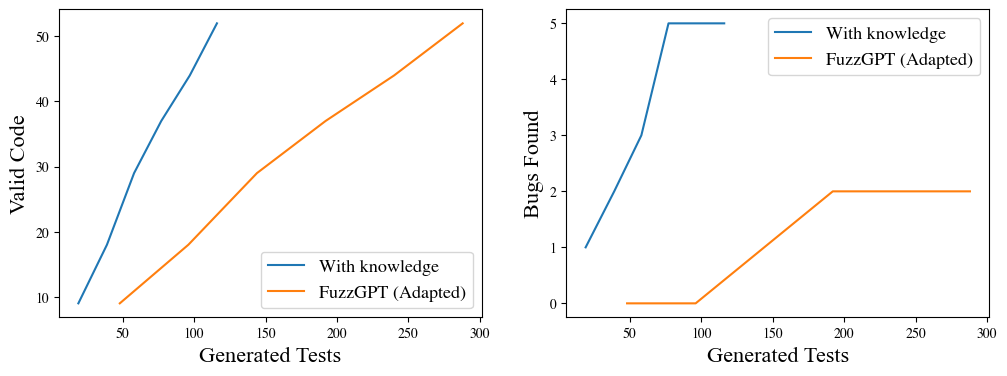

In [5]:
knowledge_bugs = pd.read_csv('ablation-data/bug-found-knowledge-Bugs found with knowledge.csv', index_col=0)
random_bugs = pd.read_csv('ablation-data/bug-found-random-Bugs found randomly.csv', index_col=0)

knowledge_valid = pd.read_csv('ablation-data/valid-code-knowledge-Valid code with knowledge.csv', index_col=0)
random_valid = pd.read_csv('ablation-data/valid-code-random-Valid code with knowledge.csv', index_col=0)

plt.rc('font', family='Times')
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)

plt.xlabel("Generated Tests", fontdict={'family': 'Times New Roman', 'size': 16})
plt.ylabel("Valid Code", fontdict={'family': 'Times New Roman', 'size': 16})

plt.plot(knowledge_valid, label='With knowledge')
plt.plot(random_valid, label='FuzzGPT (Adapted)')
plt.legend(fontsize=13, loc=4)

plt.subplot(1, 2, 2)

plt.xlabel("Generated Tests", fontdict={'family': 'Times New Roman', 'size': 16})
plt.ylabel("Bugs Found", fontdict={'family': 'Times New Roman', 'size': 16})

plt.plot(knowledge_bugs, label='With knowledge')
plt.plot(random_bugs, label='FuzzGPT (Adapted)')
plt.legend(fontsize=13, loc=1)

plt.savefig('real_bugs_plot.pdf', format='pdf', bbox_inches='tight')


In [6]:
import csv

symptoms = {}

with open('valid_issues.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        symptoms[row['url']] = row['symptom']

concated_rows = []
with open('valid_issues_labeled.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['url'] in symptoms:
            row['symptom'] = symptoms[row['url']]
        else:
            row['symptom'] = None
        concated_rows.append(row)

with open('valid_issues_labeled_with_symptoms.csv', 'w') as f:
    writer = csv.DictWriter(f, fieldnames=concated_rows[0].keys())
    writer.writeheader()
    writer.writerows(concated_rows)    

## Periods for detecting MOBs

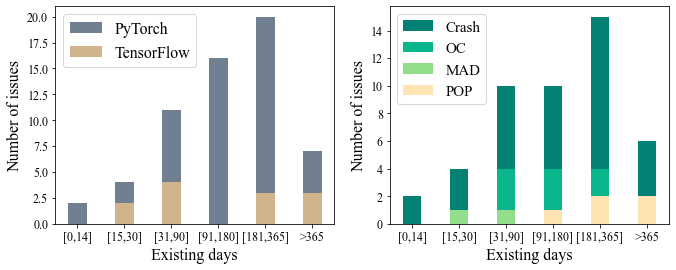

In [3]:
import csv
import matplotlib.pyplot as plt

days_crash = [0, 0, 0, 0, 0, 0]
days_oc = [0, 0, 0, 0, 0, 0]
days_mad = [0, 0, 0, 0, 0, 0]
days_pop = [0, 0, 0, 0, 0, 0]

pytorch_days = [0, 0, 0, 0, 0, 0]
tf_days = [0, 0, 0, 0, 0, 0]

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['find_duration'] == '':
            continue

        days = int(row['find_duration'])

        if days <= 7:
            day_index = 0
        elif days <= 30:
            day_index = 1
        elif days <= 90:
            day_index = 2
        elif days <= 180:
            day_index = 3
        elif days <= 365:
            day_index = 4
        else:
            day_index = 5

        if row['symptom'] == 'Crash':
            days_crash[day_index] += 1
        elif row['symptom'] == 'OC':
            days_oc[day_index] += 1
        elif row['symptom'] == 'MAD':
            days_mad[day_index] += 1
        elif row['symptom'] == 'POP':
            days_pop[day_index] += 1

        if 'pytorch' in row['repo']:
            repo = pytorch_days
        elif 'tensorflow' in row['repo']:
            repo = tf_days

        repo[day_index] += 1

name_list = ['[0,14]','[15,30]','[31,90]','[91,180]','[181,365]','>365']
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)

plt.xlabel("Existing days",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.bar(range(len(pytorch_days)),pytorch_days,tick_label=name_list,width=0.4,label='PyTorch',color='slategrey')
plt.bar(range(len(tf_days)),tf_days,tick_label=name_list,width=0.4,label='TensorFlow',color='tan')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16, loc=2)

plt.subplot(1,2,2)

plt.xlabel("Existing days",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.bar(range(len(days_crash)),days_crash,tick_label=name_list,width=0.4,label='Crash',color='#028174')
plt.bar(range(len(days_oc)),days_oc,tick_label=name_list,width=0.4,label='OC',color='#0ab68b')
plt.bar(range(len(days_mad)),days_mad,tick_label=name_list,width=0.4,label='MAD',color='#92de8b')
plt.bar(range(len(days_pop)),days_pop,tick_label=name_list,width=0.4,label='POP',color='#ffe3b3')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc=2)

# plt.show()
plt.savefig('duration_detect.pdf', format='pdf', bbox_inches='tight')

## Whether MOBs are fixed with patch

In [5]:
import csv

unresolved_count = 0
resolved_count = 0
patch_count = 0

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if 'not resolved' in row['note']:
            unresolved_count += 1
        if 'fixed' in row['note'] or 'resolved' in row['note']:
            resolved_count += 1
        if row['pr_url'] != '':
            patch_count += 1

print(unresolved_count)
print(resolved_count)
print(patch_count)

96
255
115


## Periods for fixing MOBs

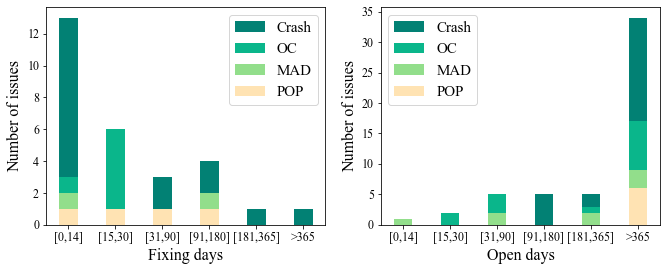

In [21]:
import csv
import matplotlib.pyplot as plt
from datetime import date, datetime

days_crash = [0, 0, 0, 0, 0, 0]
days_oc = [0, 0, 0, 0, 0, 0]
days_mad = [0, 0, 0, 0, 0, 0]
days_pop = [0, 0, 0, 0, 0, 0]

pytorch_days = [0, 0, 0, 0, 0, 0]
tf_days = [0, 0, 0, 0, 0, 0]

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['fix_duration'] == '':
            continue
        days = int(row['fix_duration'])

        if days <= 7:
            day_index = 0
        elif days <= 30:
            day_index = 1
        elif days <= 90:
            day_index = 2
        elif days <= 180:
            day_index = 3
        elif days <= 365:
            day_index = 4
        else:
            day_index = 5

        if row['symptom'] == 'Crash':
            days_crash[day_index] += 1
        elif row['symptom'] == 'OC':
            days_oc[day_index] += 1
        elif row['symptom'] == 'MAD':
            days_mad[day_index] += 1
        elif row['symptom'] == 'POP':
            days_pop[day_index] += 1

        if 'pytorch' in row['repo']:
            repo = pytorch_days
        elif 'tensorflow' in row['repo']:
            repo = tf_days

        repo[day_index] += 1

name_list = ['[0,14]','[15,30]','[31,90]','[91,180]','[181,365]','>365']
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)

plt.xlabel("Fixing days",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.bar(range(len(days_crash)),days_crash,tick_label=name_list,width=0.4,label='Crash',color='#028174')
plt.bar(range(len(days_oc)),days_oc,tick_label=name_list,width=0.4,label='OC',color='#0ab68b')
plt.bar(range(len(days_mad)),days_mad,tick_label=name_list,width=0.4,label='MAD',color='#92de8b')
plt.bar(range(len(days_pop)),days_pop,tick_label=name_list,width=0.4,label='POP',color='#ffe3b3')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc=1)

days_crash = [0, 0, 0, 0, 0, 0]
days_oc = [0, 0, 0, 0, 0, 0]
days_mad = [0, 0, 0, 0, 0, 0]
days_pop = [0, 0, 0, 0, 0, 0]

pytorch_days = [0, 0, 0, 0, 0, 0]
tf_days = [0, 0, 0, 0, 0, 0]

with open('valid_issues_labeled_with_symptoms.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['note'] != 'not resolved':
            continue

        report_time = row['report_time']
        if report_time == '':
            continue

        if row['symptom'] == 'N/A':
            continue

        report_time = datetime.strptime(report_time, "%Y.%m.%d")

        base_time = datetime.strptime('2022-08-01', "%Y-%m-%d")

        duration = base_time - report_time
        days = duration.days

        if days <= 7:
            day_index = 0
        elif days <= 30:
            day_index = 1
        elif days <= 90:
            day_index = 2
        elif days <= 180:
            day_index = 3
        elif days <= 365:
            day_index = 4
        else:
            day_index = 5

        if row['symptom'] == 'Crash':
            days_crash[day_index] += 1
        elif row['symptom'] == 'OC':
            days_oc[day_index] += 1
        elif row['symptom'] == 'MAD':
            days_mad[day_index] += 1
        elif row['symptom'] == 'POP':
            days_pop[day_index] += 1

        if 'pytorch' in row['repo']:
            repo = pytorch_days
        elif 'tensorflow' in row['repo']:
            repo = tf_days

        repo[day_index] += 1

plt.subplot(1,2,2)

plt.xlabel("Open days",fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.bar(range(len(days_crash)),days_crash,tick_label=name_list,width=0.4,label='Crash',color='#028174')
plt.bar(range(len(days_oc)),days_oc,tick_label=name_list,width=0.4,label='OC',color='#0ab68b')
plt.bar(range(len(days_mad)),days_mad,tick_label=name_list,width=0.4,label='MAD',color='#92de8b')
plt.bar(range(len(days_pop)),days_pop,tick_label=name_list,width=0.4,label='POP',color='#ffe3b3')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc=2)

plt.savefig('duration_fix.pdf', format='pdf', bbox_inches='tight')

## Breakdown of root causes

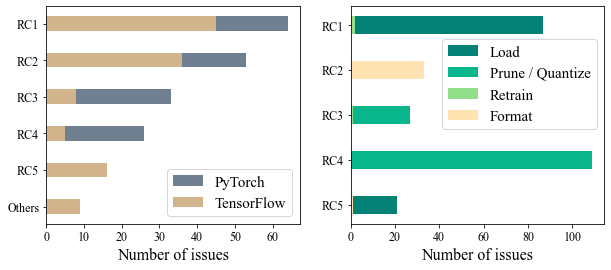

In [9]:
import matplotlib.pyplot as plt

rc1_count = [45, 64]
rc2_count = [36, 53]
rc3_count = [8, 33]
rc4_count = [5, 26]
rc5_count = [16, 6]
norc_count = [9, 3]

tf_count = [45, 36, 8, 5, 16, 9]
pytorch_count = [64, 53, 33, 26, 6, 3]

name_list = ['RC1','RC2','RC3','RC4','RC5','Others']
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)

plt.xlabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.barh(range(len(pytorch_count)),pytorch_count,tick_label=name_list,height=0.4,label='PyTorch',color='slategrey')
plt.barh(range(len(tf_count)),tf_count,tick_label=name_list,height=0.4,label='TensorFlow',color='tan')
plt.gca().invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, loc=4)

plt.subplot(1,2,2)

rc1_count = [87, 0, 2, 0]
rc2_count = [5, 0, 2, 33]
rc3_count = [3, 27, 1, 0]
rc4_count = [0, 109, 0, 0]
rc5_count = [21, 0, 0, 1]


s1_count = [87, 5, 3, 0, 21]
s2_count = [0, 0, 27, 109, 0]
s3_count = [2, 2, 1, 0, 0]
s4_count = [0, 33, 0, 0, 1]

name_list = ['RC1','RC2','RC3','RC4','RC5']

plt.xlabel("Number of issues", fontdict={'family' : 'Times New Roman', 'size'   : 16})

plt.barh(range(len(s1_count)),s1_count,tick_label=name_list,height=0.4,label='Load',color='#028174')
plt.barh(range(len(s2_count)),s2_count,tick_label=name_list,height=0.4,label='Prune / Quantize',color='#0ab68b')
plt.barh(range(len(s3_count)),s3_count,tick_label=name_list,height=0.4,label='Retrain',color='#92de8b')
plt.barh(range(len(s4_count)),s4_count,tick_label=name_list,height=0.4,label='Format',color='#ffe3b3')
plt.gca().invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15, bbox_to_anchor=(0.33, 0.4))

plt.savefig('root_cause_breakdown.pdf', format='pdf', bbox_inches='tight')